# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<br/>
<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

<br/>
<center><i><b>
Atenção: não são autorizadas cópias, divulgações ou qualquer tipo de uso deste material sem o consentimento prévio dos autores.
</center></i></b>
<br/>

## <center> Exercício - Regressão Logística <center>

Instruções
----------

Este arquivo contém o código que auxiliará no desenvolvimento do exercício. Você precisará completar as seguintes funções:

* `sigmoid()`
* `funcaoCusto()`
* `predicao()`
* `funcaoCustoReg()`

Você não poderá criar nenhuma outra função. Apenas altere as rotinas fornecidas.

## Introdução

Você foi contratado por uma grande empresa de cosméticos para desenvolver um método para classificar diferentes espécies de uma flor. Essencialmente, a empresa está interessada em separar automaticamente espécies de uma flor chamada Iris. Esse tipo de flor é composta por três espécies: **Setosa**, **Virginica** e **Versicolour**, apresentadas na Figura 1. As duas primeiras (Setosa e Virginica) possuem propriedades aromáticas de interesse da empresa, já a última (Versicolour) não pode ser utilizada.

Devido à forte semelhança visual entre elas, ocorreu a ideia de que, talvez, seja possível detectar cada espécie pelas medidas de comprimento e largura das pétalas. Com base nessa informação, a empresa criou duas bases de dados pré-classificadas (Setosa + Versicolour e Virginica + Versicolour) com as respectivas medidas das pétalas das flores. A sua função é implementar o método de regressão logística para determinar a espécie de uma Iris a partir dos dados das pétalas.

<br>
<br>

<center>
<div style="display:inline-block;">
    <div>
    <div style="padding: 5px; float: left;">
        <img src="figs/iris_setosa.jpeg" style="height:180px;"/>
        <center><em>(a) Setosa</em></center>
    </div>
    <div style="padding: 5px; float: left;">
        <img src="figs/iris_virginica.jpeg"  style="height:180px;"/> 
        <center><em>(b) Virginica</em></center>
    </div>
    <div style="padding: 5px; float: left;">
        <img src="figs/iris_versicolour.jpeg"  style="height:180px;"/>
        <center><em>(c) Versicolour</em></center>
    </div>
    </div>
    <center><em>Figura 1. Espécies de Iris.</em></center>
</div> 
</center>

## Parte 1: Visualização dos dados

Muitas vezes, a visualização dos dados auxilia na interpretação dos mesmos
e como eles estão distribuídos. 

Primeiro, vamos carregar os dados do arquivo.

In [1]:
# -*- coding: utf-8 -*-

import numpy as np #importa a biblioteca usada para trabalhar com vetores de matrizes
import pandas as pd #importa a biblioteca usada para trabalhar com dataframes (dados em formato de tabela) e análise de dados

# Importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( 'dados.csv', sep=',', index_col=None)

print('Dados carregados com sucesso!')

Dados carregados com sucesso!


Vamos dar uma olhada nas 5 primeiras amostras da base de dados.

In [2]:
# vamos usar a função display para imprimir o dataframe. 
# Também poderíamos ter usado a função print: print(df_dataset.head(n=6))
display(df_dataset.head(n=6))

,largura_petala,comprimento_petala,classe
0,4.9,3.1,0
1,4.4,3.0,0
2,5.7,4.4,0
3,5.5,4.2,0
4,4.9,3.1,0
5,5.5,2.3,1


Vamos guardar os dados dentro de uma matriz e as classes dentro de um vetor.

In [3]:
# pega os valores das n-1 primeiras colunas e guarda em uma matrix X
X = df_dataset.iloc[:, 0:-1].values 

# pega os valores da última coluna e guarda em um vetor Y
Y = df_dataset.iloc[:, -1].values 

# imprime as 5 primeiras linhas da matriz X
display('X:', X[0:5,:])

# imprime os 5 primeiros valores de Y
print('Y:', Y[0:5])

'X:'

array([[4.9, 3.1],
       [4.4, 3. ],
       [5.7, 4.4],
       [5.5, 4.2],
       [4.9, 3.1]])

Y: [0 0 0 0 0]


Vamos criar uma função para plotar os dados.

In [4]:
# importando a biblioteca matplotlib
import matplotlib.pyplot as plt

# criando a função para plotar os dados
def visualizarDados(X,Y, nome_classe0, nome_classe1):
    """
    Função usada para plotar os dados
    """
    
    #definindo o tamanho da figura 
    plt.figure(figsize=(10,8))
    
    # plota os dados da classe 0
    plt.scatter( X[Y==0,0], X[Y==0,1], label=nome_classe0, marker='o', color='red', s=80) 
    
    # plota os dados da classe 1
    plt.scatter( X[Y==1,0], X[Y==1,1], label=nome_classe1, marker='+', color='blue', s=80) 
    
    # define os nomes do eixo x e do eixo y
    plt.xlabel(r'Comprimento da pétala',fontsize='medium') 
    plt.ylabel(r'Largura da pétala',fontsize='medium') 
        
    # Plota a legenda
    plt.legend()

    # define o título do gráfico
    plt.title('Plot 2D da base de dados Iris', fontsize='x-large')
    
# chama a função que plota os dados   
visualizarDados(X,Y, 'Iris Versicolour (y=0)', 'Iris Setosa (y=1)')

# mostra o gráfico usando a função show() da matplotlib
plt.show()

<Figure size 1000x800 with 1 Axes>

## Parte 2: Cálculo do Custo e do Gradiente

Nesta parte, você usará o método do gradiente descendente para ajustar os parâmetros da regressão logística ($\theta$) para o conjunto de dados de treinamento.

O objetivo do método do gradiente é minimizar a função de custo

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[-y^{(i)} \log\left(h_\theta(x^{(i)})\right) - \left(1 - y^{(i)}\right) \log\left(1 - h_\theta(x^{(i)})\right) \right], $$

onde a hipótese $h_\theta(x)$ é determinada pela expressão

$$ h_\theta(x) = g \left(\theta^T x \right), $$

sendo que $g(.)$ corresponde à função sigmoidal:

$$ g(z) = \frac{1}{1 + e^{-z}}. $$

A seguir, você precisa completar o código que calcula a função sigmoidal $g(z)$. Note que, para $z \rightarrow +\infty$, $g(z) \rightarrow 1$ e para $z \rightarrow -\infty$, $g(z) \rightarrow 0$. Precisamente, $g(0) = 0.5$. Além disso, a sua implementação deverá ser capaz de processar vetores e matrizes de entrada. Para uma matriz, a sua função deverá computar a função sigmoidal para cada elemento.

In [5]:
def sigmoid(z):
    """
    Calcula a funcao sigmoidal  
    """
    
    # Você precisa retornar a variável g corretamente
    #
    # se z for um valor inteiro, inicializa g com 0
    if isinstance(z, int):
        g = 0
    
    # se z não é um inteiro, significa que é um array e, portanto, inicia com um vetor de zeros com a dimensão do array
    else:
        g = np.zeros( z.shape );

    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Instrucoes: Calcule a sigmoid de cada valor de z 
    #                (z pode ser uma matriz, vetor ou escalar).
    
    g = 1 / (1 + np.exp(-z))
    
    ##########################################################################
    
    return g

# testando a função sigmoidal

# com z sendo um escalar
z = sigmoid(0)
print('sigmoid(0) = %1.3f\n' %(z))

# com z sendo um vetor
z = sigmoid(np.array([0, 1]))
print('sigmoid([0,1]) = [%1.3f %1.3f]\n' %(z[0], z[1]))

# com z sendo uma matriz
z = sigmoid(np.array([[0, 1],[-1,0]]))
print('sigmoid(z) = \n', z)



sigmoid(0) = 0.500

sigmoid([0,1]) = [0.500 0.731]

sigmoid(z) = 
 [[0.5        0.73105858]
 [0.26894142 0.5       ]]


Se a sua implementação estiver correta: 

$g(0) = 0.500$;

$g([0,1]) = \begin{bmatrix} 0.500 & 0.731 \end{bmatrix}$; e 

$g(\begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}) = \begin{bmatrix} 0.5 & 0.73105858 \\ 0.26894142 & 0.5\end{bmatrix}$.

A seguir, você precisará implementar a função custo e o método do gradiente para minimizar os valores de $\theta$. Porém, primeiro, deverão ser inicializadas algumas variáveis importantes, como mostrado abaixo.

In [6]:
m, n = X.shape # m = qtde de objetos e n = qtde de atributos por objeto

X = np.column_stack( (np.ones(m),X) ) # Adiciona uma coluna de 1s em x
theta = np.zeros(n+1) # Inicializa os parâmetros que serão ajustados

# Algumas configurações do gradiente descente
iteracoes = 1500
alpha = 0.01

Agora, você precisará implementar a função custo $J(\theta)$ e o gradiente descendente que serão usados pela regressão logística. Complete o código da função **funcaoCusto**. Para isso, lembre-se de que as variáveis $X$ e $y$ não são valores escalares, mas matrizes cujas linhas representam as amostras do conjunto de treinamento.

O gradiente da função custo é um vetor de mesma dimensão de $\theta$, sendo que o $j-$ésimo elemento (para $j = 0, 1, \ldots, n$) é definido como:

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left(h_\theta(x^{(i)}) - y^{(i)} \right).x_{j}^{(i)}.$$

In [11]:
def funcaoCusto(theta, X, Y):
    """
    Calcula o custo da regressao logística
    
       J = COMPUTARCUSTO(X, y, theta) calcula o custo de usar theta como 
       parametro da regressao logistica para ajustar os dados de X e y    
    """
    
    # Initializa algumas variaveis uteis
    m = len(Y) #numero de exemplos de treinamento

    # Voce precisa retornar as seguintes variaveis corretamente
    J = 0;
    grad = np.zeros( len(theta) );
    
    # eps é um parâmetro de tolerância para a função sigmoide 
    # para evitar erro de precisão numérica, é preciso garantir que 1-sigmoid(theta'*x) >= eps
    eps = 1e-15
    
    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Instrucoes: Calcule o custo de uma escolha particular de theta.
    #             Voce precisa armazenar o valor do custo em J.
    #             Calcule as derivadas parciais e encontre o valor do gradiente
    #             para o custo com relacao ao parametro theta
    # Obs: grad deve ter a mesma dimensao de theta
    

    hipotese = sigmoid(np.dot(X, theta))
    
    cost = -Y * np.log(hipotese + eps) - (1 - Y) * np.log(1 - hipotese + eps)
        
    J = np.sum(cost)/m
        
    grad = np.dot(X.T, hipotese - Y)/m
        

    ##########################################################################
    
    return J, grad

theta = np.zeros(n+1) # Inicializa parâmetros que serao ajustados

custo, grad = funcaoCusto(theta, X, Y)
print('Custo esperado = 0.6931')
print('Custo encontrado para theta inicial (zeros) = %1.4f' %custo)

print('\n\nGradiente esperado = [0.000, -0.239, 0.161]')
print('\nGradiente encontrado para theta inicial (zeros) = ')
print('[%1.3f, %1.3f, %1.3f]' %(grad[0],grad[1],grad[2]))


Custo esperado = 0.6931
Custo encontrado para theta inicial (zeros) = 0.6931


Gradiente esperado = [0.000, -0.239, 0.161]

Gradiente encontrado para theta inicial (zeros) = 
[0.000, -0.239, 0.161]


## Parte 3: Otimização usando a biblioteca SciPy

Para ajustar os parâmetros e minimizar a função de custo de forma eficiente utilizando os gradientes calculados, será empregada a função `minimize` do ScyPy.

Observação: é normal que o Python exiba mensagens de aviso informando que houve divisão por 0 durante a execução da função de minimização

In [12]:
import scipy.optimize  

MaxIter = 100 #número máximo de iterações para a minimização da função de custo

theta = np.zeros(n+1) # Inicializa parâmetros que serao ajustados

# minimiza a funcao de custo
result = scipy.optimize.minimize(fun=funcaoCusto, x0=theta, args=(X, Y),  
                method='BFGS', jac=True, options={'maxiter': MaxIter, 'disp':True})

# coleta os thetas retornados pela função de minimização
theta = result.x

custo, grad = funcaoCusto(theta, X, Y) 

print('\nCusto encontrado: %f\n' %custo)
print('Custo esperado: 0.000021 (aproximadamente)')

Optimization terminated successfully.
         Current function value: 0.000021
         Iterations: 41
         Function evaluations: 44
         Gradient evaluations: 44

Custo encontrado: 0.000021

Custo esperado: 0.000021 (aproximadamente)


Agora, será plotado o limite de decisão.

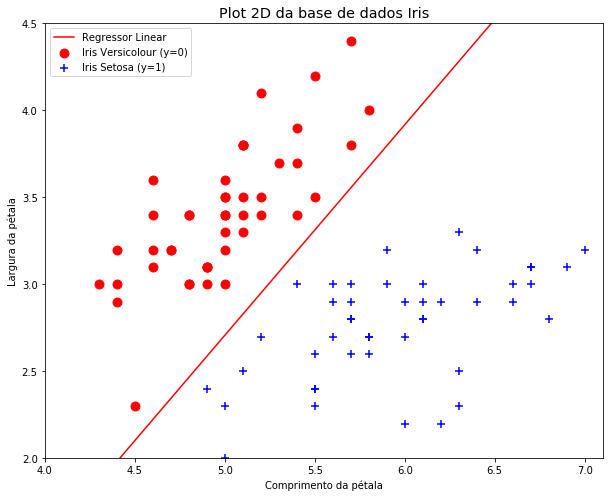

In [9]:
# plota os dados de treinamento
visualizarDados(X[:,1:],Y, 'Iris Versicolour (y=0)', 'Iris Setosa (y=1)')

plot_x = np.array( [np.min(X[:,1])-2,  np.max(X[:,1])+2] )
plot_y = np.array( (-1/theta[2])*(theta[1]*plot_x + theta[0]) ) 
    
# plota o regressor encontrado
plt.plot( plot_x, plot_y, label = 'Regressor Linear', color='red', linestyle='-', linewidth=1.5) 

plt.xlim([4,7.1]) # set the xlim 
plt.ylim([2,4.5]) # set the xlim

# coloca a legenda
plt.legend()
    
plt.show()

## Parte 4: Predição e desempenho

Após ajustados os parâmetros $\theta$, você poderá usar o classificador para predizer a classe de novos dados. Além disso, você poderá calcular a acurácia do modelo sobre a base de treinamento.

Primeiro, complete a função `predicao()`. Essa função deve calcular a predição de $X$ usando um limiar igual a 0.5. Assim, se $g \left(\theta^T x \right) >= 0.5$, então $y = 1$.

In [10]:
def predicao(theta, X):
    """
    Prediz se a entrada pertence a classe 0 ou 1 usando o parametro
    theta obtido pela regressao logistica
    
    p = PREDICAO(theta, X) calcula a predicao de X usando um 
    limiar igual a 0.5 (ex. se sigmoid(theta'*x) >= 0.5, classe = 1)
    """   
    
    # Numero de exemplos de treinamento
    m = X.shape[0]
    
    # Você precisa retornar a seguinte variavel corretamente
    p = np.zeros(m, dtype=int) 
    
    
    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Instrucoes: Complete o codigo a seguir para fazer predicoes usando
    # os paramentros ajustados pela regressao logistica. 
    # p devera ser um vetor composto somente por 0's e 1's
    
    prob = sigmoid(np.dot(X, theta))
    p = (prob >= 0.5).astype(int)    
    
    ##########################################################################
    
    return p

# realiza a predição dos dados
p = predicao(theta, X)

acuracia = np.mean(p == Y) * 100
print('\nAcuracia obtida na base de treinamento: %1.2f\n' %acuracia);

print('\nAcuracia esperada na base de treinamento: 100.00\n');


Acuracia obtida na base de treinamento: 100.00


Acuracia esperada na base de treinamento: 100.00



## Parte 5: Predizendo a classe de novos dados

A seguir, vamos testar um novo exemplo de Iris e verificar qual classe será atribuída pelo método de classificação. Você poderá testar outros valores de comprimento e largura da pétala para ver o resultado da predição.

In [11]:
comprimento_petala = 4.5
largura_petala = 4.5

X = np.array( [[1,comprimento_petala,largura_petala]] )

# realiza a predição da nova amostra
p = predicao(theta, X)

prob = sigmoid( np.dot(X, theta ) );

if p[0] == 1:
    print('Classe = Iris Setosa (y = 1) com probabilidade igual a %f%%' %(prob*100))
else:
    print('Classe = Iris Versicolour (y = 0) com probabilidade igual a %1.2f%%' %((1-prob)*100))

Classe = Iris Versicolour (y = 0) com probabilidade igual a 100.00%


## Parte 6: Carrega exemplo de dados não separáveis linearmente

Agora, vamos testar o método usando uma base de dados mais complexa com amostras **normalizadas** de Iris Virginica e Iris Versicolour.

In [12]:
# Importa o arquivo e guarda em um dataframe do Pandas
df_dataset2 = pd.read_csv( 'dados2.csv', sep=',', index_col=None) 

# Imprime as 6 primeiras amostras
display(df_dataset2.head(n=6))

,largura_petala,comprimento_petala,classe
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1
5,-0.524770,0.20980,1


Novamente, vamos guardar os dados dentro de uma matriz e as classes dentro de um vetor. As cinco primeiras amostras serão imprimidas.

In [13]:
# Pega os valores das n-1 primeiras colunas e guarda em uma matrix X
X2 = df_dataset2.iloc[:, 0:-1].values 

# Pega os valores da última coluna e guarda em um vetor Y
Y2 = df_dataset2.iloc[:, -1].values 

# Imprime as 5 primeiras linhas da matriz X
display('X2:', X2[0:5,:])

# Imprime os 5 primeiros valores de Y
print('Y2:', Y2[0:5])

'X2:'

array([[ 0.051267,  0.69956 ],
       [-0.092742,  0.68494 ],
       [-0.21371 ,  0.69225 ],
       [-0.375   ,  0.50219 ],
       [-0.51325 ,  0.46564 ]])

Y2: [1 1 1 1 1]


Os dados serão plotados usando a função definida anteriormente.

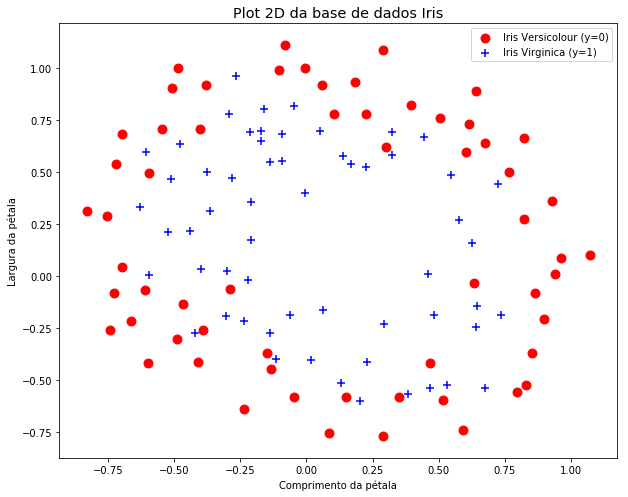

In [14]:
# Função que plota os dados   
visualizarDados(X2,Y2, 'Iris Versicolour (y=0)', 'Iris Virginica (y=1)')

# mostra o gráfico usando a função show() da matplotlib
plt.show()

Claramente, as amostras não são linearmente separáveis e, portanto, novos atributos polinomiais precisarão ser criados para melhorar o limite de decisão da regressão logística.

Abaixo, vamos construir uma função que gera dados polinomiais. Esta função mapeia o vetor original com apenas duas colunas em um vetor transformado com 28 dimensões. Dessa forma, o classificador gerado pela regressão logística será treinado com uma base de dimensão mais elevada e poderá produzir um limite de decisão mais complexo.

In [15]:
def atributosPolinomiais(X1,X2):
    """
    Gera atributos polinomiais a partir dos atriburos
    originais da base

    ATRIBUTOSPOLINOMIAIS(X1, X2) mapeia os dois atributos de entrada
    para atributos quadraticos
 
    Retorna um novo vetor de mais atributos:
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
 
    As entradas X1, X2 devem ser do mesmo tamanho
    """
    
    grau=6
    
    # se se X1 é um array. Se não for, converte para array
    if not isinstance(X1,  np.ndarray):
        X1 = np.array( [[X1]] )
        X2 = np.array( [[X2]] )
        
    out = np.ones( len(X1) )
    
    for i in range( 1,grau+1 ):
        for j in range( 0,i+1 ):
            out_temp = ( X1**(i-j) ) * (X2**j)
            
            out = np.column_stack( (out,out_temp) ) # Adicionar uma coluna de 1s em x

    return out

# atributosPolinomiais adiciona novas colunas que correspondem a atributos polinomiais
X2_poli = atributosPolinomiais(X2[:,0],X2[:,1]) 

print('Dimensão do novo conjunto de dados polinomiais: \n', X2_poli.shape)


Dimensão do novo conjunto de dados polinomiais: 
 (118, 28)


Se por um lado o mapeamento dos atributos pode aumentar a robustez do classificador, por outro, ele ficará mais suscetível ao super-ajustamento dos dados (*overfitting*). Assim sendo, para resolver esse impasse, você precisará implementar a regressão logística com regularização.

## Parte 7: Regressão Logística com Regularização

A sua próxima tarefa é completar o código da função `funcaoCustoReg()`. Agora, a equação da regressão logística deverá incorporar a regularização e poderá ser expressa por:

$$ J(\theta) = \left[ \frac{1}{m} \sum_{i=1}^{m} \left[-y^{(i)} \log\left(h_\theta(x^{(i)})\right) - \left(1 - y^{(i)}\right) \log\left(1 - h_\theta(x^{(i)})\right) \right] \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_{j}^2. $$

Note que não é preciso regularizar o parâmetro $\theta_0$. O gradiente da função de custo é um vetor no qual o $j-$ésimo elemento é definido como:

$$\frac{\partial J(\theta)}{\partial \theta_j}= 
\begin{cases}
    \displaystyle \frac{1}{m} \sum_{i=1}^{m} \left(h_\theta(x^{(i)}) - y^{(i)} \right).x_{j}^{(i)},& \text{se } j = 0\\
    \displaystyle \left(\frac{1}{m} \sum_{i=1}^{m} \left(h_\theta(x^{(i)}) - y^{(i)} \right).x_{j}^{(i)}\right) + \frac{\lambda}{m} \theta_j,              & \text{se } j \geq 0\\
\end{cases}
$$

A seguir, calcule e exiba o custo inicial e o gradiente para regressão logística com regularização.

In [20]:
def funcaoCustoReg(theta, X, Y, lambda_reg):
    """
    Calcula o custo da regressao logística
    
       J = COMPUTARCUSTO(X, y, theta) calcula o custo de usar theta como 
       parametro da regressao logistica para ajustar os dados de X e y    
    """
    
    # Initializa algumas variaveis uteis
    m = len(Y) #numero de exemplos de treinamento

    # Voce precisa retornar a seguinte variavel corretamente
    J = 0
    grad = np.zeros( len(theta) )
    
    # eps é um parâmetro de tolerância para a função sigmoide 
    # para evitar erro de precisão numérica, é preciso garantir que 1-sigmoid(theta'*x) >= eps
    eps = 1e-15
    
    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Instrucoes: Calcule o custo de uma escolha particular de theta.
    #             Voce precisa armazenar o valor do custo em J.
    #             Calcule as derivadas parciais e encontre o valor do gradiente
    #             para o custo com relacao ao parametro theta
    # Obs: grad deve ter a mesma dimensao de theta
    
    hipotese = 0
    reg = 0
    
    hipotese = sigmoid(np.dot(X, theta))
    
    cost = (-Y * np.log(hipotese + eps)) - ((1 - Y) * np.log(1 - hipotese + eps))
    
    reg = (lambda_reg/(2*m) * np.sum(theta[1:] ** 2))
         
    J = (1/m * np.sum(cost)) + reg
        
    grad[0] = (np.dot(X.T, hipotese - Y)[0])/m
    grad[1:] = (np.dot(X.T, hipotese - Y)[1:])/m + (lambda_reg/m)*theta[1:]
       
    ##########################################################################
    
    return J, grad


# inicializa algumas variáveis importantes

# m = qtde de objetos e n = qtde de atributos por objeto
m, n = X2_poli.shape

# Inicializa os parâmetros que serao ajustados
theta = np.zeros(n)

# Configura o parametro de regularizacao lambda igual a 1
lambda_reg = 1

custo, grad = funcaoCustoReg(theta, X2_poli, Y2, lambda_reg)
print('\nCusto esperado = 0.6931\n')
print('Custo encontrado para theta inicial (zeros) = %1.4f' %custo)


Custo esperado = 0.6931

Custo encontrado para theta inicial (zeros) = 0.6931


## Parte 8: Regularização e desempenho

Nesta etapa, você pode testar diferente valores de lambda e verificar como a regularização afeta o limite de decisão.

In [21]:
# Configura o parametro de regularizacao lambda igual a 1
lambda_reg = 1

# Algumas configuracoes do gradiente descente
iteracoes = 50
theta = np.zeros(n) # Inicializa parâmetros que serao ajustados

# minimiza a funcao de custo
result = scipy.optimize.minimize(fun=funcaoCustoReg, x0=theta, args=(X2_poli, Y2, lambda_reg),  
                method='BFGS', jac=True, options={'maxiter': iteracoes, 'disp':True})

# coleta os thetas retornados pela função de minimização
theta = result.x

custo, grad = funcaoCustoReg(theta, X2_poli, Y2, lambda_reg) 

print('\nCusto encontrado: %f\n' %custo)
print('Custo esperado: 0.529003 (aproximadamente)')

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 47
         Function evaluations: 48
         Gradient evaluations: 48

Custo encontrado: 0.529003

Custo esperado: 0.529003 (aproximadamente)


A seguir, será plotado o limite de decisão do classificador.

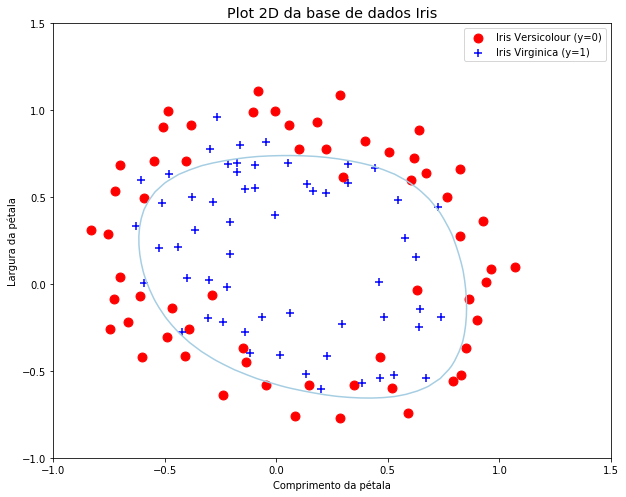

In [18]:
# plota os dados de treinamento
visualizarDados(X2,Y2, 'Iris Versicolour (y=0)', 'Iris Virginica (y=1)')

u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

z = np.zeros( [len(u), len(v)] )

for i in range( len(u) ):
    for j in range( len(v) ):
        z[i,j] = np.dot( atributosPolinomiais( u[i], v[j] ),theta);

plt.contour(u, v, z, levels=[0], cmap=plt.cm.Paired)

    
plt.show()

Calcula a acurácia obtida na base de treinamento.

In [19]:
# realiza a predição dos dados
p = predicao(theta, X2_poli)

acuracia = np.mean(p == Y2) * 100
print('\nAcuracia obtida na base de treinamento: %1.2f\n' %acuracia);
print('Acuracia esperada na base de treinamento: 83.05\n');


Acuracia obtida na base de treinamento: 83.05

Acuracia esperada na base de treinamento: 83.05



## Parte 9: Predizendo a classe de novos dados

Agora, você pode usar o classificador treinado para predizer a classe de novas amostras (com atributos normalizados).

In [31]:
comprimento_petala_norm = 0.10
largura_petala_norm = 0.30

X2_novo = np.array( [[comprimento_petala_norm,largura_petala_norm]] )

X2_novo_poli = atributosPolinomiais(X2_novo[:,0], X2_novo[:,1])

# faz a predição do novo dado
p = predicao(theta, X2_novo_poli)

prob = sigmoid( np.dot(X2_novo_poli, theta ) );

if p[0] == 1:
    print('Classe = Iris Virginica (y=1) com probabilidade igual a %1.2f%%' %(prob*100))
else:
    print('Classe = Iris Versicolour (y = 0) com probabilidade igual a %1.2f%%' %((1-prob)*100))

Classe = Iris Virginica (y=1) com probabilidade igual a 81.21%
